这里说频率是指一个机场航班出现的频率

## 加载数据

数据已经预处理过了

In [21]:
import pandas as pd

# 加载数据
data = pd.read_csv('../../../../data-hh/2025/2025-5/result/pre_2023-2025_with_comp_train.csv', dtype={'flt_no': str})

# 查看前几行数据，确保加载成功
# 显示前两行数据以确保正确加载
print(data.shape)
print(data.head(5))
print(data.tail(5))

(1622828, 20)
   flt_no    cap aircraft  legs  leg_no  duration  pax       a       b  \
0  3c6705  110.0      195     1       1      1.30   97  a9f275  24cc4b   
1  6a67d9  110.0      195     1       1      1.25   67  d56796  24cc4b   
2  de569b   93.0      190     3       3      4.75   22  d56796  ec1b13   
3  284078  162.0      320     1       1      1.83   55  e3d141  d618e3   
4  f8765b  167.0      320     1       1      3.98  166  9550bc  2e1ea1   

        c   unit_price  competitor_price  year  month  day  weekday  hour  \
0  7f9c2b   470.474227        -94.900773  2023      1    1        6    14   
1  7f9c2b   454.925373       -123.872095  2023      1    1        6    22   
2  dcf90a  1177.818182        977.818182  2023      1    1        6    18   
3  7f9c2b   669.090909          0.000000  2023      1    1        6    12   
4  7f9c2b  1794.783133       1564.978621  2023      1    1        6    13   

   minute from   to  
0      35  a9f  c4b  
1      40  d56  c4b  
2       0  d

In [22]:
# 检查标准化后的统计信息
print("\n标准化后的统计信息：")
print(data['pax'].describe())


标准化后的统计信息：
count    1.622828e+06
mean     1.222837e+02
std      5.231566e+01
min      2.000000e+01
25%      8.300000e+01
50%      1.280000e+02
75%      1.590000e+02
max      3.110000e+02
Name: pax, dtype: float64


## 编码分类变量

### 新增城市标签

In [23]:
import json
# 加载字典
with open('../../../../data-hh/2025/2025-5/result/encoder/city_labels_航班频率加权图标签.json', 'r') as file:
    city_labels_loaded = json.load(file)

print("加载的字典：", city_labels_loaded)

加载的字典： {'000': 1, '13f': 0, '8e3': 0, 'a18': 0, 'eda': 2, '01a': 1, 'b5a': 0, 'ea1': 0, '03f': 2, '1be': 0, '3bc': 0, '578': 0, '5df': 0, '5fb': 0, '760': 0, '792': 0, '7ff': 0, '90a': 2, '974': 0, 'bbb': 0, 'cb5': 0, 'ffe': 0, '059': 2, '022': 0, '077': 0, '0d7': 0, '0dd': 0, '1a3': 0, '1e9': 0, '1ed': 0, '25c': 0, '311': 0, '354': 0, '451': 0, '510': 0, '5d7': 0, '63a': 0, '666': 0, '6e3': 0, '7f1': 0, '812': 0, '8a1': 0, '9d4': 2, '9e9': 0, 'b3a': 0, 'bff': 0, 'c24': 0, 'c3a': 0, 'c4c': 0, 'c98': 0, 'c9f': 0, 'cb7': 0, 'd7c': 0, 'e76': 0, 'e9c': 0, 'efb': 0, '05c': 2, '141': 0, '157': 0, '709': 0, '8ac': 0, '97f': 0, '988': 0, 'a2f': 0, 'b09': 0, 'c14': 0, 'c4b': 0, 'e5b': 0, 'ec2': 0, '074': 1, '4d0': 0, '695': 0, 'c2c': 0, 'fa9': 0, '08c': 1, '08f': 2, '3c5': 0, '5e8': 0, 'a72': 0, 'd54': 0, 'ff1': 0, '0ac': 1, '0c8': 1, '0ca': 1, 'e09': 0, '0d1': 1, '13e': 0, '1ee': 0, '43e': 0, '0db': 2, '919': 0, 'd08': 0, '0ff': 2, '11b': 1, '123': 2, '5de': 0, '8eb': 0, '124': 1, '130': 2, '1

In [24]:
# 使用 map 对 'a', 'b', 'c', 'from', 'to' 列进行标签化，新增对应的标签列
data['a_label'] = data['a'].map(city_labels_loaded)
data['b_label'] = data['b'].map(city_labels_loaded)
data['c_label'] = data['c'].map(city_labels_loaded)
data['from_label'] = data['from'].map(city_labels_loaded)
data['to_label'] = data['to'].map(city_labels_loaded)

### 新增城市二维嵌入

In [25]:
import json

# 加载字典
with open('../../../../data-hh/2025/2025-5/result/encoder/城市嵌入编码_航班频率加权图.json', 'r') as file:
    city_embeddings = json.load(file)

print("加载的字典：", city_embeddings)


加载的字典： {'000': [-1.6396723985671997, 0.8463003039360046], '13f': [0.6835631728172302, 0.28853702545166016], '8e3': [0.605768084526062, 0.43108901381492615], 'a18': [0.1772567182779312, 0.35664066672325134], 'eda': [-0.18683721125125885, 0.786605715751648], '01a': [-1.6955363750457764, 0.015374363400042057], 'b5a': [0.6262921690940857, 0.6344022154808044], 'ea1': [0.2808123230934143, -0.011203848756849766], '03f': [-0.929985761642456, 1.23349928855896], '1be': [0.8312583565711975, 0.8889409899711609], '3bc': [1.4587459564208984, 1.2139819860458374], '578': [0.9716920256614685, 0.5555941462516785], '5df': [0.8122007846832275, 1.0064148902893066], '5fb': [0.7514726519584656, 0.360472708940506], '760': [1.288560390472412, 0.6948064565658569], '792': [0.14092816412448883, 0.706443727016449], '7ff': [1.017447829246521, 0.27192866802215576], '90a': [0.07465023547410965, 0.3252807855606079], '974': [1.2340888977050781, 0.8395470380783081], 'bbb': [0.4277801811695099, 0.7776517868041992], 'cb5'

In [26]:
import pandas as pd
import numpy as np

# 将 city_embeddings 转换为 DataFrame
embedding_df = pd.DataFrame.from_dict(city_embeddings, orient='index', columns=['embedding_1', 'embedding_2'])
embedding_df.index.name = 'city'

# 用 'a', 'b', 'c', 'from', 'to' 字段与 embedding_df 合并
data = data.merge(embedding_df, left_on='a', right_index=True, how='left')
data.rename(columns={'embedding_1': 'a_embedding_1', 'embedding_2': 'a_embedding_2'}, inplace=True)

data = data.merge(embedding_df, left_on='b', right_index=True, how='left')
data.rename(columns={'embedding_1': 'b_embedding_1', 'embedding_2': 'b_embedding_2'}, inplace=True)

data = data.merge(embedding_df, left_on='c', right_index=True, how='left')
data.rename(columns={'embedding_1': 'c_embedding_1', 'embedding_2': 'c_embedding_2'}, inplace=True)

data = data.merge(embedding_df, left_on='from', right_index=True, how='left')
data.rename(columns={'embedding_1': 'from_embedding_1', 'embedding_2': 'from_embedding_2'}, inplace=True)

data = data.merge(embedding_df, left_on='to', right_index=True, how='left')
data.rename(columns={'embedding_1': 'to_embedding_1', 'embedding_2': 'to_embedding_2'}, inplace=True)

# 查看添加的新列
print(data[['a_embedding_1', 'a_embedding_2', 'b_embedding_1', 'b_embedding_2', 'c_embedding_1', 'c_embedding_2', 'from_embedding_1', 'from_embedding_2', 'to_embedding_1', 'to_embedding_2']])


         a_embedding_1  a_embedding_2  b_embedding_1  b_embedding_2  \
0                  NaN            NaN            NaN            NaN   
1                  NaN            NaN            NaN            NaN   
2                  NaN            NaN            NaN            NaN   
3                  NaN            NaN            NaN            NaN   
4                  NaN            NaN            NaN            NaN   
...                ...            ...            ...            ...   
1622823            NaN            NaN            NaN            NaN   
1622824            NaN            NaN            NaN            NaN   
1622825            NaN            NaN            NaN            NaN   
1622826            NaN            NaN            NaN            NaN   
1622827            NaN            NaN            NaN            NaN   

         c_embedding_1  c_embedding_2  from_embedding_1  from_embedding_2  \
0                  NaN            NaN         -1.642773         -1.587

### 频率编码

使用 json 保存和加载 city_map

In [27]:
# 加载city_map
with open('../../../../data-hh/2025/2025-5/result/encoder/city_map_频率编码.json', 'r') as f:
    city_map = json.load(f)

# 使用 city_map 替换指定列的值
columns_to_replace = ['a', 'b', 'c', 'from', 'to']

# 遍历指定列并直接用 map 映射
for col in columns_to_replace:
    data[col] = data[col].map(city_map)


print(data)

         flt_no    cap aircraft  legs  leg_no  duration  pax   a   b   c  \
0        3c6705  110.0      195     1       1      1.30   97 NaN NaN NaN   
1        6a67d9  110.0      195     1       1      1.25   67 NaN NaN NaN   
2        de569b   93.0      190     3       3      4.75   22 NaN NaN NaN   
3        284078  162.0      320     1       1      1.83   55 NaN NaN NaN   
4        f8765b  167.0      320     1       1      3.98  166 NaN NaN NaN   
...         ...    ...      ...   ...     ...       ...  ...  ..  ..  ..   
1622823  5951a4  164.0      73A     1       1      2.38  169 NaN NaN NaN   
1622824  97ddc8   95.0      190     3       2      2.05   54 NaN NaN NaN   
1622825  2c157d   95.0      190     3       2      1.78   56 NaN NaN NaN   
1622826  408f86  155.0      32F     3       2      1.42   65 NaN NaN NaN   
1622827  b60fa0  155.0      32F     3       2      2.03   91 NaN NaN NaN   

          unit_price  competitor_price  year  month  day  weekday  hour  \
0         47

### 'flt_no', 'bd_type', 'aircraft'编码

In [28]:
import joblib
from sklearn.preprocessing import LabelEncoder
import os

# 定义需要编码的分类特征
# categorical_columns = ['flt_no', 'bd_type', 'aircraft']
categorical_columns = ['flt_no', 'aircraft']

# 从保存的文件中加载编码器并应用到data
for col in categorical_columns:
    # 加载编码器
    encoder_path = os.path.join('../../../../data-hh/2025/2025-5/result/encoder/', f"{col}_encoder_all.pkl")
    le = joblib.load(encoder_path)
    
    try:
        # 对data进行转换
        data[col] = le.transform(data[col])
        print(f"{col}列编码完成")
    except ValueError as e:
        # 如果遇到新的类别，打印错误信息
        print(f"{col}列编码出错: {str(e)}")
        # 找出新的类别
        new_categories = set(data[col]) - set(le.classes_)
        print(f"{col}列中的新类别: {new_categories}")

# 查看编码后的结果
print("\n编码后的前几行数据：")
print(data[categorical_columns].head())

flt_no列编码完成
aircraft列编码完成

编码后的前几行数据：
   flt_no  aircraft
0    1097         2
1    1859         2
2    3888         0
3     719         9
4    4325         9


## 特征和目标分离
我们要预测的是pax字段，其他字段作为特征。

In [29]:
# 特征列
# X = data[['flt_no', 'bd_type', 'cap', 'aircraft',  'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','holiday', 'hour', 'minute', 'second', 'from', 'to','unit_price']]
# X = data[['flt_no', 'bd_type', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','hour', 'minute', 'second', 'from', 'to','unit_price']]
# X = data[['flt_no', 'bd_type', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','hour', 'minute', 'second', 'from', 'to','unit_price','a_label' ,'b_label' ,'c_label' ,'from_label' ,'to_label']]

# 有abc，有标签，有嵌入
# X = data[['flt_no', 'bd_type', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','hour', 'minute', 'second', 'from', 'to','unit_price','a_label' ,'b_label' ,'c_label' ,'from_label' ,'to_label','a_embedding_1' , 'a_embedding_2' , 'b_embedding_1','b_embedding_2' , 'c_embedding_1' , 'c_embedding_2' , 'from_embedding_1','from_embedding_2' , 'to_embedding_1' , 'to_embedding_2']]
# X = data[['flt_no', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','hour', 'minute', 'from', 'to','unit_price','a_label' ,'b_label' ,'c_label' ,'from_label' ,'to_label','a_embedding_1' , 'a_embedding_2' , 'b_embedding_1','b_embedding_2' , 'c_embedding_1' , 'c_embedding_2' , 'from_embedding_1','from_embedding_2' , 'to_embedding_1' , 'to_embedding_2']]
X = data[['flt_no', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'a', 'b', 'c', 'year', 'month', 'day', 'weekday','hour', 'minute', 'from', 'to','unit_price','competitor_price','a_label' ,'b_label' ,'c_label' ,'from_label' ,'to_label','a_embedding_1' , 'a_embedding_2' , 'b_embedding_1','b_embedding_2' , 'c_embedding_1' , 'c_embedding_2' , 'from_embedding_1','from_embedding_2' , 'to_embedding_1' , 'to_embedding_2']]

# 删除了abc，但有标签，有嵌入
# X = data[['flt_no', 'bd_type', 'cap', 'aircraft', 'legs', 'leg_no', 'duration', 'year', 'month', 'day', 'weekday','hour', 'minute', 'second', 'unit_price','a_label' ,'b_label' ,'c_label' ,'from_label' ,'to_label','a_embedding_1' , 'a_embedding_2' , 'b_embedding_1','b_embedding_2' , 'c_embedding_1' , 'c_embedding_2' , 'from_embedding_1','from_embedding_2' , 'to_embedding_1' , 'to_embedding_2']]

# 目标列
y = data['pax']

### 对x进行标准化

In [30]:
from sklearn.preprocessing import StandardScaler

# 对所有特征进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标准化后的数据转回 DataFrame 格式
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 查看结果
pd.set_option('display.max_columns', None)  # 显示所有列
print(X_scaled.head(1))


# 保存 scaler
joblib.dump(scaler, '../../../../data-hh/2025/2025-5/result/encoder/standard_scaler_x.pkl')
print("x的标准化器已保存为 standard_scaler_x.pkl")

/home/zhanyu/anaconda3/envs/machine/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/zhanyu/anaconda3/envs/machine/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/zhanyu/anaconda3/envs/machine/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


     flt_no       cap  aircraft      legs    leg_no  duration   a   b   c  \
0 -0.849957 -1.497274 -1.386045 -0.850028 -0.557392 -1.236698 NaN NaN NaN   

       year     month       day   weekday      hour  minute      from  \
0 -0.942273 -1.275476 -1.681813  1.483571 -0.000868  0.4796 -1.345293   

         to  unit_price  competitor_price  a_label  b_label  c_label  \
0  0.207053   -0.564497          -0.45413      NaN      NaN      NaN   

   from_label  to_label  a_embedding_1  a_embedding_2  b_embedding_1  \
0   -3.667879 -0.305874            NaN            NaN            NaN   

   b_embedding_2  c_embedding_1  c_embedding_2  from_embedding_1  \
0            NaN            NaN            NaN         -2.402695   

   from_embedding_2  to_embedding_1  to_embedding_2  
0         -3.013874       -1.057717       -2.891073  
x的标准化器已保存为 standard_scaler_x.pkl


### 对y进行标准化

In [31]:
# 对目标列 y 进行标准化
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # 将 y 转换为 2D 数组进行标准化

# 转换回 DataFrame 格式
y_scaled = pd.DataFrame(y_scaled, columns=['pax_scaled'])

# 查看标准化后的 y
print(y_scaled.head())

# 保存 y 的 scaler
joblib.dump(scaler_y, '../../../../data-hh/2025/2025-5/result/encoder/standard_scaler_y.pkl')
print("y的标准化器已保存为 standard_scaler_y.pkl")

   pax_scaled
0   -0.483291
1   -1.056734
2   -1.916897
3   -1.286111
4    0.835626
y的标准化器已保存为 standard_scaler_y.pkl


## 训练XGBoost模型

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 自定义 SMAPE 函数
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred)
    return np.mean(diff / denominator) * 100

# 自定义评估函数
def smape_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    smape_value = smape(y_true, y_pred)
    return 'SMAPE', smape_value

# 数据划分
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 输出数据集大小
print(f'训练集大小: {X_train.shape[0]}')
print(f'验证集大小: {X_val.shape[0]}')
print(f'测试集大小: {X_test.shape[0]}')

# 转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 10,#10效果最好
    'subsample': 0.8,#0.8效果最好
    'colsample_bytree':1,
    'alpha': 1,
    "lambda":1
}

# 设置评估集
evals = [(dtrain, 'train'), (dval, 'validation')]

# 训练模型，使用自定义评估指标
model = xgb.train(
    params,
    dtrain,
    num_boost_round=750,
    evals=evals,
    early_stopping_rounds=10,
    custom_metric=smape_eval,  # 使用 custom_metric 参数
    verbose_eval=10 #隔多少轮显示一次
)

# 预测测试集
y_pred = model.predict(dtest)

# # 测试集 SMAPE 评估
# test_smape = smape(y_test, y_pred)
# print(f'SMAPE on Test Set: {test_smape:.2f}%')

# # 测试集 MSE 评估
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')

训练集大小: 1298262
验证集大小: 162283
测试集大小: 162283
[0]	train-rmse:0.92450	train-SMAPE:168.51760	validation-rmse:0.92504	validation-SMAPE:168.65903
[10]	train-rmse:0.54350	train-SMAPE:87.71392	validation-rmse:0.54450	validation-SMAPE:87.94012
[20]	train-rmse:0.45483	train-SMAPE:74.08418	validation-rmse:0.45718	validation-SMAPE:74.37702
[30]	train-rmse:0.42796	train-SMAPE:69.63150	validation-rmse:0.43184	validation-SMAPE:70.05655
[40]	train-rmse:0.41429	train-SMAPE:67.29871	validation-rmse:0.41992	validation-SMAPE:67.85757
[50]	train-rmse:0.40516	train-SMAPE:65.95502	validation-rmse:0.41197	validation-SMAPE:66.59495
[60]	train-rmse:0.39938	train-SMAPE:65.11747	validation-rmse:0.40749	validation-SMAPE:65.90490
[70]	train-rmse:0.39450	train-SMAPE:64.44943	validation-rmse:0.40359	validation-SMAPE:65.35689
[80]	train-rmse:0.39042	train-SMAPE:63.90462	validation-rmse:0.40056	validation-SMAPE:64.91755
[90]	train-rmse:0.38729	train-SMAPE:63.48700	validation-rmse:0.39813	validation-SMAPE:64.58319
[100]	

In [33]:
y_pred

array([ 0.290119 ,  0.017095 ,  0.285069 , ..., -0.7596514, -1.5432067,
        0.7265298], dtype=float32)

In [34]:
# 反标准化 y_test
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# 反标准化预测结果 y_pred
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [35]:
y_test_original

array([[123.],
       [132.],
       [129.],
       ...,
       [104.],
       [ 57.],
       [166.]])

In [36]:
y_pred_original

array([[137.46147 ],
       [123.17804 ],
       [137.19727 ],
       ...,
       [ 82.54205 ],
       [ 41.549847],
       [160.29257 ]], dtype=float32)

In [37]:
# 正确的写法
test_results = list(zip(y_test_original[:100], y_pred_original[:100]))  # 真实值和预测值

print("\n20条测试结果（真实值 vs 预测值）:")
for i, (true_value, pred_value) in enumerate(test_results[:40]):
    # 如果是多维数组，使用 .item() 转换为标量
    true_value = true_value.item() if isinstance(true_value, np.ndarray) else true_value
    pred_value = pred_value.item() if isinstance(pred_value, np.ndarray) else pred_value
    print(f"第{i+1}条: 真实值={true_value}, 预测值={pred_value:.2f}")



20条测试结果（真实值 vs 预测值）:
第1条: 真实值=123.0, 预测值=137.46
第2条: 真实值=132.0, 预测值=123.18
第3条: 真实值=129.0, 预测值=137.20
第4条: 真实值=137.0, 预测值=132.48
第5条: 真实值=130.0, 预测值=123.89
第6条: 真实值=172.0, 预测值=175.86
第7条: 真实值=172.0, 预测值=176.73
第8条: 真实值=101.0, 预测值=94.26
第9条: 真实值=162.0, 预测值=154.18
第10条: 真实值=200.0, 预测值=176.17
第11条: 真实值=164.0, 预测值=171.06
第12条: 真实值=102.0, 预测值=97.62
第13条: 真实值=75.0, 预测值=83.00
第14条: 真实值=109.0, 预测值=98.74
第15条: 真实值=229.0, 预测值=219.30
第16条: 真实值=115.0, 预测值=83.63
第17条: 真实值=46.0, 预测值=38.38
第18条: 真实值=106.0, 预测值=125.06
第19条: 真实值=177.0, 预测值=174.94
第20条: 真实值=30.0, 预测值=42.29
第21条: 真实值=73.0, 预测值=68.73
第22条: 真实值=26.0, 预测值=29.12
第23条: 真实值=122.0, 预测值=125.15
第24条: 真实值=91.0, 预测值=88.90
第25条: 真实值=154.0, 预测值=132.82
第26条: 真实值=60.0, 预测值=61.75
第27条: 真实值=135.0, 预测值=140.35
第28条: 真实值=150.0, 预测值=119.86
第29条: 真实值=178.0, 预测值=172.06
第30条: 真实值=207.0, 预测值=186.39
第31条: 真实值=41.0, 预测值=40.65
第32条: 真实值=181.0, 预测值=172.27
第33条: 真实值=179.0, 预测值=171.31
第34条: 真实值=77.0, 预测值=61.21
第35条: 真实值=156.0, 预测值=145.64
第36条: 真实值=136.0, 预测值=132.25
第

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_smape(y_true, y_pred):
    """
    计算 Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    y_true, y_pred = np.array(y_true).ravel(), np.array(y_pred).ravel()
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_pred - y_true)
    
    # 避免除以零，将分母中为零的项替换为一个小值
    denominator = np.where(denominator == 0, 1e-8, denominator)
    
    smape = 100 * np.mean(diff / denominator)
    return smape


def calculate_mape(y_true, y_pred):
    """
    计算 Mean Absolute Percentage Error (MAPE)
    """
    y_true, y_pred = np.array(y_true).ravel(), np.array(y_pred).ravel()
    
    # 避免除以零，将 y_true 中的零值替换为一个小值
    y_true = np.where(y_true == 0, 1e-8, y_true)
    
    mape = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
    return mape


# 假设 y_test 和 y_pred 已经是标准化反归一化后的数据
# 将其转换为一维数组以确保形状一致
y_test = np.array(y_test_original).ravel()
y_pred = np.array(y_pred_original).ravel()

# 评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = calculate_mape(y_test, y_pred)
smape = calculate_smape(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印结果
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')
print(f'Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}%')
print(f'R-squared (R²): {r2:.4f}')

Mean Squared Error (MSE): 336.9945
Root Mean Squared Error (RMSE): 18.3574
Mean Absolute Error (MAE): 13.7899
Mean Absolute Percentage Error (MAPE): 15.8847%
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2442%
R-squared (R²): 0.8769


似乎对于较小值预测存在误差

## 保存模型

In [39]:
model.save_model("../../../../data-hh/2025/2025-5/result/model/归一化_xgboost_model_1000.json")
print("模型已保存为 xgboost_model_1000.json")

模型已保存为 xgboost_model_1000.json


## 超参数设置

## 不同特征重要程度测试

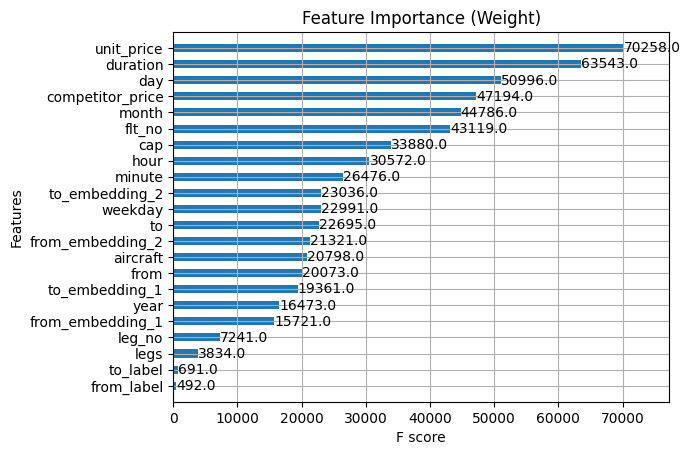

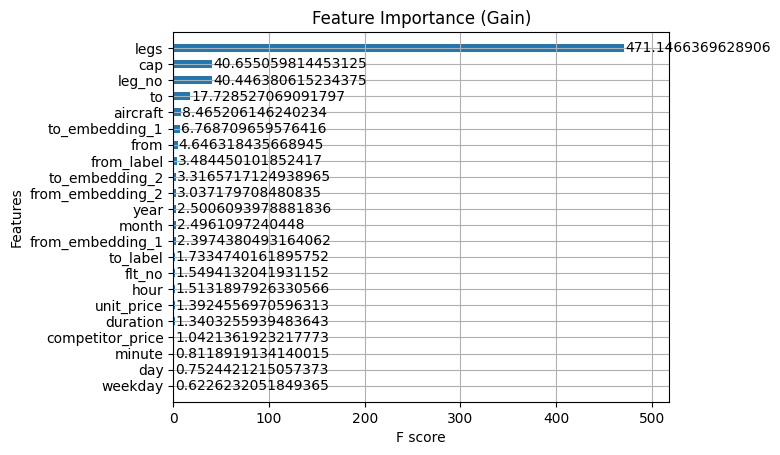

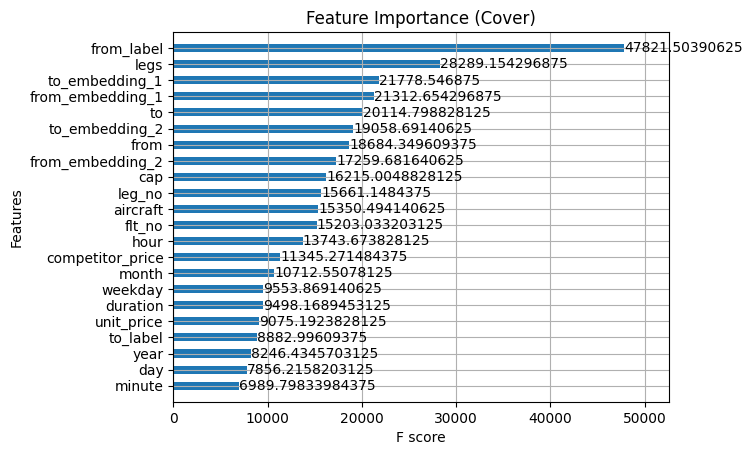

In [40]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 model 是训练好的 XGBoost 模型
xgb.plot_importance(model, importance_type='weight', title="Feature Importance (Weight)", height=0.5)
plt.show()

xgb.plot_importance(model, importance_type='gain', title="Feature Importance (Gain)", height=0.5)
plt.show()

xgb.plot_importance(model, importance_type='cover', title="Feature Importance (Cover)", height=0.5)
plt.show()